# Google Play Store and Apple App Store Analysis

### Final Project

Group 7
Nicolette Sauramba,
Laura Yuan,
Yu Hsuan Huang

In [1]:
# Basics
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

warnings.filterwarnings('ignore')

# Reading the file
data = pd.read_csv('Google-Playstore.csv')
apple = pd.read_csv('AppleStore.csv')

### Our goal is to discover which categories, applications, and developers that are currently popular in the market. In order to do so, we analyzed Google Play store and Apple App store data in order to evaluate the trends in the app market. 

## <div class="alert alert-block alert-info">Data Description<div>

#### Sources:

Google Playstore data: https://www.kaggle.com/gauthamp10/google-playstore-apps

*  App Names
*  Category (Education, Travel & Local, *Food...etc.)
*  Rating (From 0.0-5.0)
*  Installs
*  Free (True or False) / Price
*  Release Date
*  Ad Supported (True or False)
*  Editor’s Choice (True or False)

Apple App Store data: https://www.kaggle.com/cmqub19/763k-ios-app-info

*  App Names
*  Category (Education, Travel & Local, *Food...etc.)
*  Rating (From 0.0-5.0)
*  Number of Ratings (which will be used as # of installs)
*  Free (True or False) / Price
*  Release Date

In [3]:
print("The length of the first data on Google Play Store apps is " + str(len(data)))
print("The length of the second data on Apple App Store apps is " + str(len(apple)))

The length of the first data on Google Play Store apps is 603047
The length of the second data on Apple App Store apps is 763831


#### Data Frames

In [4]:
data.head(2)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,foodpanda - Local Food & Grocery Delivery,com.global.foodpanda.android,Food & Drink,4.4,1258493.0,"10,000,000+",10000000.0,48828081,True,0.0,...,Foodpanda GmbH a subsidiary of Delivery Hero SE,http://foodpanda.com,appsupport@foodpanda.com,"Nov 19, 2013",2020-07-07 00:14:05,Everyone,https://www.foodpanda.sg/contents/privacy.htm,False,False,False
1,"Tripadvisor Hotel, Flight & Restaurant Bookings",com.tripadvisor.tripadvisor,Travel & Local,4.4,1360172.0,"100,000,000+",100000000.0,371284181,True,0.0,...,Tripadvisor,https://www.tripadvisor.com/help,mobilehelp@tripadvisor.com,"Jul 12, 2010",2020-07-02 20:10:48,Everyone,https://www.tripadvisor.com/pages/privacy.html,True,False,False


In [5]:
apple.head(1)

,_id,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description
0,5ddd0f935add2aa7a436dfa3,1224614786,abc - writing style cursive flashcards worksheets,Wattana Kamdee,1.202553e+09,https://apps.apple.com/us/app/abc-writing-styl...,NaN,4+,-1.0,-1.0,0.0,0,2017-04-10T23:00:59Z,2017-04-10T23:00:59Z,0.0,Games,"['Games', 'Books', 'Family']",['EN'],This application helps you practice cursive sc...


## <div class="alert alert-block alert-info">Data Cleaning<div>

We have performed the following to clean our data.

#### Changing column names to code-friendly format:

In [6]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Renaming install column
data = data.rename(columns={"installs":"delete"})
data = data.rename(columns={"maximum_installs":"installs"})

In [7]:
apple.columns = apple.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Renaming columns
apple = apple.rename(columns={"total_number_of_ratings":"rating_count"})
apple = apple.rename(columns={"original_release_date":"released"})
apple = apple.rename(columns={"current_version_release_date":"last_updated"})
apple = apple.rename(columns={"primary_genre":"category"})
apple = apple.rename(columns={"title":"app_name"})
apple = apple.rename(columns={"developer_name":"developer_id"})
apple = apple.rename(columns={"total_average_rating":"rating"})

#### Removing Unwanted Columns:

In [8]:
data = data.drop(columns = 'privacy_policy')
data = data.drop(columns = 'app_id')
data = data.drop(columns = 'developer_website')
data = data.drop(columns = 'developer_email')
data = data.drop(columns = 'minimum_installs')
data = data.drop(columns = 'delete')
data = data.drop(columns = 'minimum_android')

In [9]:
apple = apple.drop(columns = '_id')
apple = apple.drop(columns = 'ios_app_id')
apple = apple.drop(columns = 'developer_ios_id')
apple = apple.drop(columns = 'all_genres')
apple = apple.drop(columns = 'languages')
apple = apple.drop(columns = 'seller_official_website')
apple = apple.drop(columns = 'number_of_ratings_for_version')
apple = apple.drop(columns = 'ios_store_url')
apple = apple.drop(columns = 'average_rating_for_version')
apple = apple.drop(columns = 'description')

#### Changing True/False values to 1/0:

In [10]:
data['ad_supported'] = data['ad_supported']*1
data['in_app_purchases'] = data['in_app_purchases']*1
data['editors_choice'] = data['editors_choice']*1
data['free'] = data['free']*1

#### Dropping NaN, blanks:

In [11]:
data = data.dropna()
data[data.values == ''].count().sum()

0

In [12]:
apple = apple.dropna()
apple[apple.values == ''].count().sum()

0

#### Since we are analyzing the ratings for Google Playstore applications, we have determined that it would be appropriate to remove data that does not contain any ratings.

In [13]:
data = data[data.rating_count != 0]

In [14]:
apple = apple[apple.rating_count > 0]

#### Converting price in foreign currencies to USD (using merge):

In [15]:
data.currency.unique()

array(['USD', 'SGD', 'VND', 'GBP', 'XXX', 'EUR', 'RON', 'TRY', 'IDR',
       'RUB', 'CAD', 'BRL', 'UAH', 'INR', 'HKD', 'JPY'], dtype=object)

In [16]:
dfRate=pd.DataFrame([['EUR',0.84],['USD',1],['SGD',1.34],['VND',23132.00],['GBP',0.75],['XXX',0],['RON',4.08],['TRY',7.83],['IDR',14154.05],['RUB',76.40],['CAD',1.30],['BRL',5.33],['UAH',28.59],['INR',73.98],['HKD',7.75],['JPY',104.37]], columns=['currency','value'])
dfRate.head()

,currency,value
0,EUR,0.84
1,USD,1.00
2,SGD,1.34
3,VND,23132.00
4,GBP,0.75


In [17]:
data = pd.merge(data, dfRate, how='left', left_on=['currency'], right_on=['currency'])
data['price_usd'] = data.price / data.value
data = data.dropna()

#### Creating a 'revenue' column for analysis purposes:

For our Google Play store data, we determined that <b> revenue = number of installs * price of app </b>.
For our Apple App store data, we determined that <b> revenue = number of ratings * price of app </b >since there is no available data on how many number of installs there are. We are assumming that those that have rated the app have installed the app.. 

In [18]:
data['revenue'] = data.price_usd * data.installs

In [19]:
apple['revenue'] = apple.price_usd * apple.rating_count

#### Adding a 'free' dummy column for the Apple dataframe

In [20]:
apple['free'] = apple.price_usd.apply(lambda x: 0 if x > 0 else 1)

### After Data Cleaning:

In [21]:
print("The length of the cleaned data on Google Play Store apps is " + str(len(data)))
print("The length of the cleaned data on Apple App Store apps is " + str(len(apple)))

The length of the cleaned data on Google Play Store apps is 418270
The length of the cleaned data on Apple App Store apps is 172090


## <div class="alert alert-block alert-info">Analysis<div>

#### Descriptive Statistics

In [22]:
data.describe()

,rating,rating_count,installs,free,price,ad_supported,in_app_purchases,editors_choice,value,price_usd,revenue
count,418270.000000,4.182700e+05,4.182700e+05,418270.000000,418270.000000,418270.000000,418270.000000,418270.000000,418270.000000,418270.000000,4.182700e+05
mean,4.133192,1.165142e+04,1.149440e+06,0.952447,0.217390,0.598353,0.173431,0.001846,1.089919,0.217390,5.364167e+03
std,0.604223,3.821723e+05,4.165778e+07,0.212819,2.789178,0.490232,0.378620,0.042922,41.930080,2.789178,3.674678e+05
min,1.000000,5.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000e+00
25%,3.900000,2.100000e+01,3.442000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00
50%,4.300000,9.100000e+01,1.628400e+04,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00
75%,4.600000,5.780000e+02,9.294525e+04,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00
max,5.000000,1.170193e+08,9.975727e+09,1.000000,400.000000,1.000000,1.000000,1.000000,23132.000000,400.000000,2.134249e+08


In [23]:
apple.describe()

,rating,rating_count,price_usd,revenue,free
count,172090.000000,1.720900e+05,172090.000000,1.720900e+05,172090.000000
mean,3.713737,2.676372e+03,0.621653,3.431636e+02,0.869446
std,1.374207,6.468959e+04,5.759429,1.641113e+04,0.336913
min,-1.000000,1.000000e+00,-1.000000,-9.327000e+03,0.000000
25%,3.500000,7.000000e+00,0.000000,0.000000e+00,1.000000
50%,4.000000,1.800000e+01,0.000000,0.000000e+00,1.000000
75%,4.500000,9.600000e+01,0.000000,0.000000e+00,1.000000
max,5.000000,1.203608e+07,999.990000,5.501913e+06,1.000000


#### Correlations:

In [24]:
data.corr()

,rating,rating_count,installs,free,price,ad_supported,in_app_purchases,editors_choice,value,price_usd,revenue
rating,1.000000,0.008613,0.004054,-0.027311,0.007678,0.103020,-0.002875,0.013678,0.001694,0.007678,0.003302
rating_count,0.008613,1.000000,0.553285,0.005944,-0.002071,0.005953,0.037789,0.172764,-0.000064,-0.002071,0.014135
installs,0.004054,0.553285,1.000000,0.006000,-0.002104,-0.000651,0.017988,0.074287,-0.000059,-0.002104,0.000980
free,-0.027311,0.005944,0.006000,1.000000,-0.348815,0.242912,0.035028,0.000971,0.000479,-0.348815,-0.065330
price,0.007678,-0.002071,-0.002104,-0.348815,1.000000,-0.086151,-0.011645,-0.000704,-0.000167,1.000000,0.088701
ad_supported,0.103020,0.005953,-0.000651,0.242912,-0.086151,1.000000,0.134331,0.004553,-0.002597,-0.086151,-0.013835
in_app_purchases,-0.002875,0.037789,0.017988,0.035028,-0.011645,0.134331,1.000000,0.068426,-0.000958,-0.011645,0.008410
editors_choice,0.013678,0.172764,0.074287,0.000971,-0.000704,0.004553,0.068426,1.000000,-0.000092,-0.000704,0.042361
value,0.001694,-0.000064,-0.000059,0.000479,-0.000167,-0.002597,-0.000958,-0.000092,1.000000,-0.000167,-0.000031
price_usd,0.007678,-0.002071,-0.002104,-0.348815,1.000000,-0.086151,-0.011645,-0.000704,-0.000167,1.000000,0.088701


In [25]:
apple.corr()

,rating,rating_count,price_usd,revenue,free
rating,1.000000,0.024609,0.005424,0.010341,0.000151
rating_count,0.024609,1.000000,-0.003545,0.043871,0.011639
price_usd,0.005424,-0.003545,1.000000,0.066262,-0.278815
revenue,0.010341,0.043871,0.066262,1.000000,-0.054006
free,0.000151,0.011639,-0.278815,-0.054006,1.000000


## <div class="alert alert-block alert-success"> 1. What type of app is most popular? </div>

The three factors we are using to evaluate 'popularity' for the <b> Google Play store </b> data is: <b> rating, rating count, and number of installs </b>

The two factors we are using to evaluate 'popularity' for the <b> Apple Play store </b> data is: <b> rating and rating count </b> since there is no available data on how many number of installs there are. We are assumming that those that have rated the app have installed the app.

### Google Play store

#### Most popular apps:


In [26]:
data.groupby(['app_name','developer_id','category'], as_index = False)\
                       ['rating','installs','rating_count']\
              .agg('mean')\
              .sort_values(by=['rating','installs','rating_count'] , ascending=[False,False,False])\
              .head()

,app_name,developer_id,category,rating,installs,rating_count
351293,Wickr Me – Private Messenger,Wickr Inc,Social,5.0,6179163,89003.0
248307,Police Robot Car Rampage: New robot shooting G...,Happy Family Studio,Adventure,5.0,900896,1279.0
131889,Goat Robot Transforming Games: ATV Bike Robot ...,Buntoo Games,Travel & Local,5.0,558593,1594.0
336956,Urdu Poetry Offline,Wiki Tech,Entertainment,5.0,543643,1996.0
216315,My Train Info - PNR & Where is My Train,AppAspect Technologies Pvt. Ltd.,Travel & Local,5.0,530849,465.0


#### Most popular category of apps:

In [27]:
# By Genre
data.groupby('category', as_index=False).agg({'rating':'mean','installs':'sum','rating_count':'sum'})\
                                        .sort_values(by=['installs','rating','rating_count'],ascending = False)\
                                        .head()

,category,rating,installs,rating_count
42,Tools,3.965280,73149502130,334350229.0
13,Communication,4.069454,54350646353,425147330.0
33,Productivity,4.005142,34633351617,116782674.0
32,Photography,3.943165,22683391607,174066421.0
45,Video Players & Editors,3.851388,22103798738,178737041.0


Text(0.5, 0.98, 'Most Popular Apps by Content Rating')

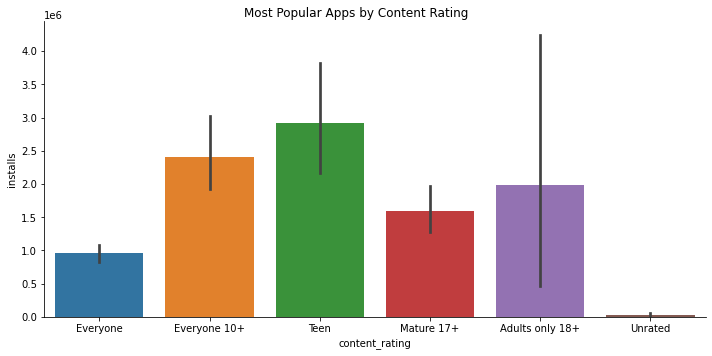

In [28]:
# By content rating
x = sns.catplot(y='installs', data=data, x='content_rating',\
            aspect=2, kind='bar', order=['Everyone','Everyone 10+','Teen','Mature 17+','Adults only 18+','Unrated'])
x.fig.suptitle("Most Popular Apps by Content Rating")

### Apple App store

Due to lack of installs data, we use <b> rating_count and rating only </b> to determine popularity for the Apple Store data. It is important to note, however, that rating_count can be limited as it is affected by so many other factors. For example, some apps might encourage their users to rate their apps more than others.

#### Most popular apps:


In [29]:
apple.groupby(['app_name','developer_id','category'], as_index = False)['rating','rating_count']\
              .agg('mean')\
              .sort_values(by=['rating_count','rating'] , ascending=False)\
              .head()

,app_name,developer_id,category,rating,rating_count
166472,"YouTube: Watch, Listen, Stream",Google LLC,Photo & Video,4.5,12036084.0
142372,Spotify: Music and Podcasts,Spotify Ltd.,Music,5.0,11687033.0
159278,Venmo,Venmo,Finance,5.0,7747894.0
45598,DoorDash - Food Delivery,"DoorDash, Inc.",Food & Drink,5.0,5541964.0
60601,Fortnite,Epic Games,Games,4.5,5117253.0


#### Most popular category of apps:

In [30]:
#By Genre
apple.groupby('category', as_index=False).agg({'rating':'mean','rating_count':'sum'})\
                                        .sort_values(by=['rating_count','rating'],ascending = False)\
                                        .head()

,category,rating,rating_count
6,Games,3.713687,217279117.5
4,Finance,4.003472,47036144.0
3,Entertainment,3.411957,34883394.0
5,Food & Drink,3.593079,29574876.0
11,Music,3.634351,26330453.5


Text(0.5, 0.98, 'Most Popular Apps by Content Rating')

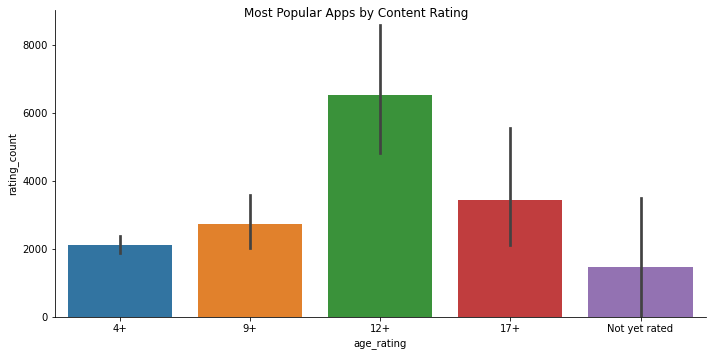

In [31]:
x = sns.catplot(y='rating_count', data=apple, x='age_rating',\
            aspect=2, kind='bar', order=['4+','9+','12+','17+','Not yet rated'])
x.fig.suptitle("Most Popular Apps by Content Rating")

### <div class="alert alert-block alert-warning"> Based on our findings and graphs, we found that the most popular categories in both the Google Play store and the Apple App store seems to share a common theme that games, communication, and productivity apps (train app, finance apps, delivery apps) are the most popular. Further, we found that in both the Google Play store and the Apple App store that content for teenagers are the most popular content.
</div>

### <div class="alert alert-block alert-success"> 2. When is the best time to release an app? </div>

### Google Play store

#### Finding the maximum amount of releases in a day:

In [32]:
releases = data.groupby('released')['released'].count().nlargest(5)
data['month'] = data['released'].apply(lambda x: x.split(' ')[0])
releases.nlargest(3)

released
Nov 26, 2018    383
Oct 29, 2018    366
Nov 14, 2018    353
Name: released, dtype: int64

#### For each category when is the best time to release the app (based on the number of installs):


In [33]:
best_month = data.groupby('month').agg({'installs':'sum'})
data.groupby('month').agg({'installs':'sum'}).sort_values(by='installs',ascending = False).head(3)

,installs
month,
May,54749371629
Oct,53054621142
Jun,46223941203


Text(0.5, 0.98, 'Number of Installs vs Release Month')

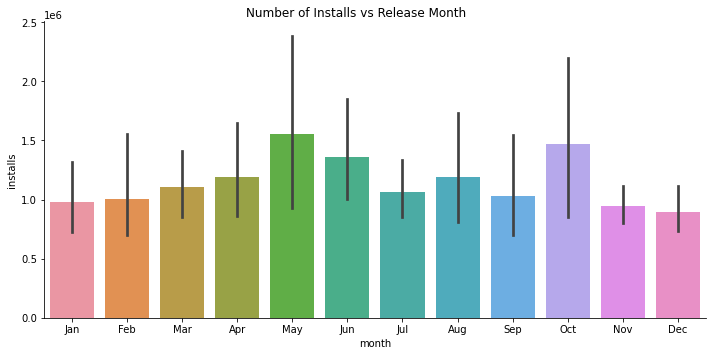

In [34]:
x = sns.catplot(y='installs', data=data, x='month',kind='bar', aspect=2,\
                order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
x.fig.suptitle('Number of Installs vs Release Month')

### Apple App store

In [35]:
releases = apple.groupby('released')['released'].count().nlargest(5)
apple['month'] = apple['released'].apply(lambda x: x.split('-')[1])
releases.head(3)

released
2008-07-11T07:00:00Z    81
2019-09-19T07:00:00Z    67
2013-12-20T08:00:00Z    55
Name: released, dtype: int64

In [36]:
# For each category when is the best time to release the app. Based on the number of installs.
apple_month = apple.groupby('month').agg({'rating_count':'sum'})
apple.groupby('month').agg({'rating_count':'sum'}).sort_values(by='rating_count',ascending = False).head(3)

,rating_count
month,
07,55922666.5
09,47960566.0
12,46575903.5


Text(0.5, 0.98, 'Number of Installs vs Release Month')

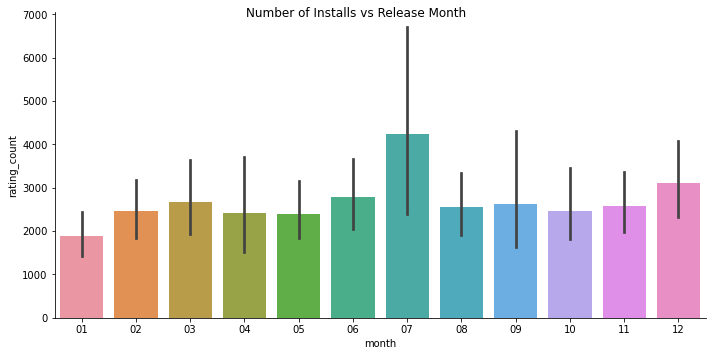

In [37]:
x = sns.catplot(y='rating_count', data=apple, x='month',kind='bar', aspect=2)
x.fig.suptitle('Number of Installs vs Release Month')

### <div class="alert alert-block alert-warning"> For the Google Play store, we found that <b> May </b> seems to be the best month to release an app because apps released in May has the most installs. For the Apple App store, we found that <b> July </b> seems to be the best month to release an app. While these two graphs differ, we noticed that there seems to be an overall trend that summer (May-July) to be the best time to release an app.
</div>

### <div class="alert alert-block alert-success"> 3. What is the best price to charge for an app? </div>

### Google Play store

#### Comparing free apps vs. paid apps:

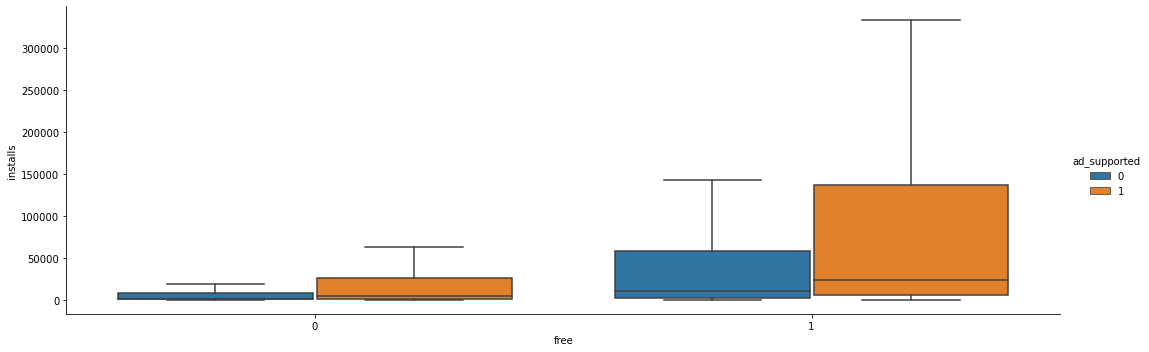

In [38]:
sns.catplot(y='installs', data=data, x='free', hue='ad_supported',\
            aspect=3, kind='box', showfliers = False)

#### App prices with the largest amount of revenue:

In [39]:
data.groupby('price_usd')['revenue'].sum().nlargest()

price_usd
4.99    3.351261e+08
6.99    2.994027e+08
2.99    2.115238e+08
0.99    1.840346e+08
3.99    1.745789e+08
Name: revenue, dtype: float64

Text(0.5, 0.98, 'Revenue vs Price Charged For App')

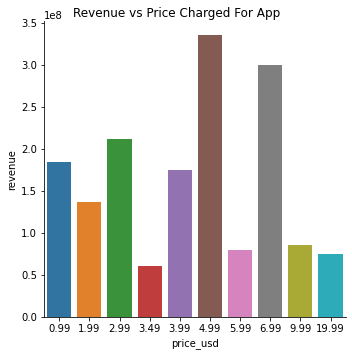

In [40]:
best_price= data.groupby('price_usd', as_index=False).agg({'revenue':'sum'})\
                .sort_values(by='revenue',ascending = False).head(10)

x=sns.catplot(x='price_usd', y='revenue', data=best_price, kind='bar')
x.fig.suptitle('Revenue vs Price Charged For App')

### Apple App store

#### Comparing free apps vs. paid apps:

Since we don't have 'number of installs' available, we determined to just analyze how many free and paid apps there are in the Apple app store.

In [41]:
print("The amount of free apps in the Apple Playstore is " + str(len(apple[apple.free == 1])))
print("The amount of paid apps in the Apple Playstore is " + str(len(apple[apple.free == 0])))

The amount of free apps in the Apple Playstore is 149623
The amount of paid apps in the Apple Playstore is 22467


#### App prices with the largest amount of revenue:

In [42]:
apple.groupby('price_usd')['revenue'].sum().nlargest()

price_usd
6.99    8420629.320
4.99    7919102.555
2.99    7452758.885
1.99    7116202.190
0.99    5055880.995
Name: revenue, dtype: float64

Text(0.5, 0.98, 'Revenue vs Price Charged For App')

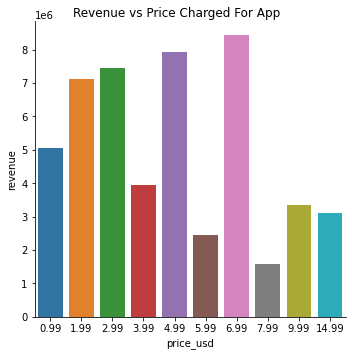

In [43]:
apple_price= apple.groupby('price_usd', as_index=False).agg({'revenue':'sum'}).sort_values(by='revenue',ascending = False).head(10)
x=sns.catplot(x='price_usd', y='revenue', data=apple_price, kind='bar')
x.fig.suptitle('Revenue vs Price Charged For App')

### <div class="alert alert-block alert-warning"> Based on our findings, we found that for both the Google Play store and the Apple App store, the best prices to charge is 4,99 and 6,99. For the Google Play store, of those that did charge for the app, apps charging 4,99 had the most revenue of over 300M overall. So while price is a factor, the biggest revenue makers are charging 4,99. So while price is a factor, the biggest revenue makers are charging 4,99 or 6,99. This can definitely guide app developers and business professionals everywhere. </div>

### <div class="alert alert-block alert-success"> Other Findings... </div>

#### Most Popular Developers:

### Google Play store

In [44]:
data.groupby('developer_id').agg({'rating':'mean','installs':'mean','rating_count':'sum'})\
                            .sort_values(by=['installs','rating','rating_count'], ascending=False)\
                            .head()

,rating,installs,rating_count
developer_id,,,
WhatsApp Inc.,4.2,1.977555e+09,122668051.0
Skype,4.3,1.605309e+09,11177590.0
Snap Inc,4.3,1.278455e+09,22934461.0
Flipboard,4.1,9.200359e+08,1926635.0
Viber Media S.à r.l.,4.3,9.079056e+08,13883893.0


### Apple App store

In [45]:
apple.groupby('developer_id').agg({'rating':'mean','rating_count':'sum'})\
                            .sort_values(by=['rating_count','rating'] , ascending=False)\
                            .head()

,rating,rating_count
developer_id,,
Google LLC,4.011111,18020633.0
Spotify Ltd.,4.333333,11695833.0
Voodoo,4.467742,9798972.5
Venmo,5.000000,7747894.0
"DoorDash, Inc.",4.750000,5584217.0


## <div class="alert alert-block alert-info">Graphs<div>

### Google Play store

#### Rating distribution:

In [46]:
data1 = data.copy()
data1['discretized_rating_EW'] = pd.cut(data1.rating ,5)

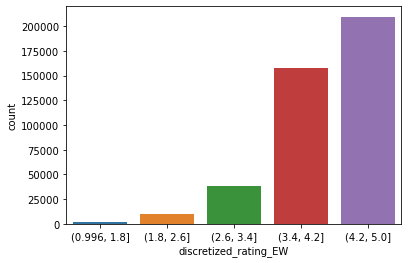

In [47]:
sns.countplot(x='discretized_rating_EW', data=data1)

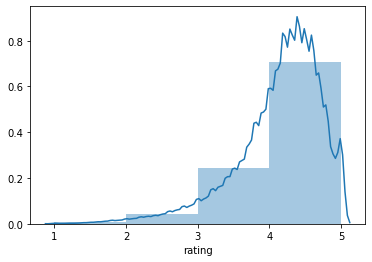

In [48]:
# Distribution of ratings 
sns.distplot(data.rating, bins=4)

#### Evaluating 'Editor's Choice'

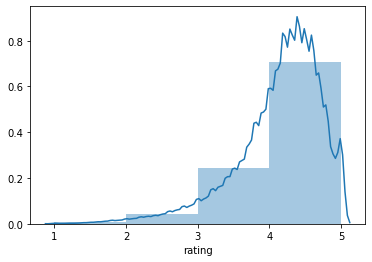

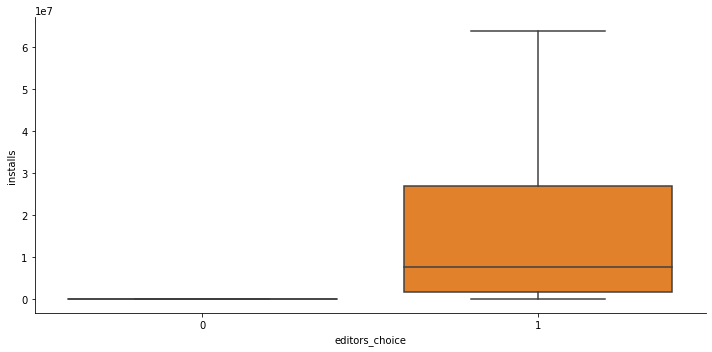

In [49]:
sns.distplot(data.rating, bins=4)# Editors Choice vs. Installs
sns.catplot(y='installs', data=data, x='editors_choice',\
            aspect=2, kind='box', showfliers = False)

### Decision Tree

### Google Play store

In [50]:
tree_installs = data.copy()

In [51]:
# Checking for unique variables
for c in tree_installs.columns:
    print(c + ' ' + str(tree_installs[c].nunique()) )

app_name 418270
category 48
rating 41
rating_count 30848
installs 165394
free 2
price 584
currency 15
size 1377
developer_id 94928
released 3827
last_updated 416175
content_rating 6
ad_supported 2
in_app_purchases 2
editors_choice 2
value 15
price_usd 584
revenue 16928
month 12


In [52]:
tree_installs = tree_installs.drop(columns = 'app_name')
tree_installs = tree_installs.drop(columns = 'category')
tree_installs = tree_installs.drop(columns = 'rating')
tree_installs = tree_installs.drop(columns = 'rating_count')
tree_installs = tree_installs.drop(columns = 'size')
tree_installs = tree_installs.drop(columns = 'developer_id')
tree_installs = tree_installs.drop(columns = 'released')
tree_installs = tree_installs.drop(columns = 'last_updated')
tree_installs = tree_installs.drop(columns = 'value')
tree_installs = tree_installs.drop(columns = 'price_usd')
tree_installs = tree_installs.drop(columns = 'revenue')
tree_installs = tree_installs.drop(columns = 'currency')
tree_installs = tree_installs.drop(columns = 'price')
tree_installs = tree_installs.drop(columns = 'month')

In [53]:
# Make dummies 
tree_installs = pd.get_dummies(tree_installs, columns=['content_rating'],
        dummy_na=True)

In [54]:
# Finding the mean value of installs
tree_installs.installs.mean()

1149439.7573218257

In [55]:
# Make binary variable (1 for installs above mean, 0 for installs below mean)
tree_installs['install_abovemean'] = tree_installs.installs.apply(lambda x: 1 if x > 1149440 else 0)
tree_installs = tree_installs.drop(columns = 'installs')

Forming X and Y variables

In [56]:
X = tree_installs.drop(columns = 'install_abovemean')

In [57]:
Y = tree_installs.install_abovemean

In [58]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [59]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

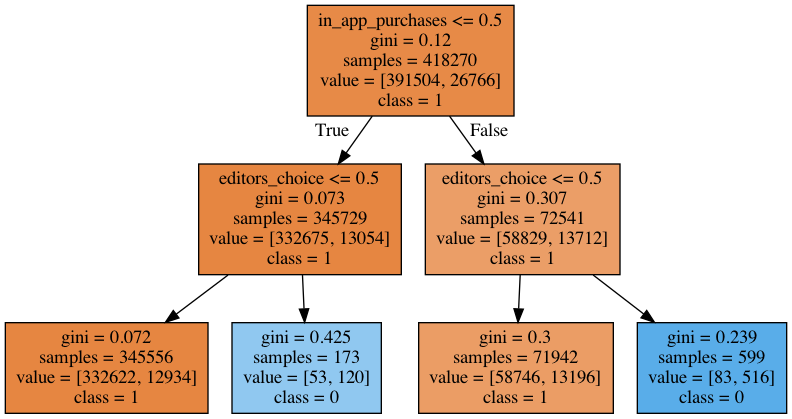

In [60]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

## <div class="alert alert-block alert-info">Conclusion<div>

### We wanted to analyze this data in the hopes that we could inform developers, business professionals and aspiring entrepreneurs on how and when to release new apps in ways that would help achieve their goals. Some of these goals include creating apps that are popular and profitable. We believe our findings will help achieve these goals. The three most important findings are:
1. We found that the most popular apps were gaming, communication, and productivty apps which was no surprise as we are now living in the world of social media.
2. Secondly, we found that of the apps that were not free, those priced at 4.99 and 6.99 made the most revenue.
3. Lastly, we found that overall, the most installed apps were those released around summer (May-July).